# 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
# sns.set()
# sns.set_style("whitegrid")
# sns.set_color_codes()
# %matplotlib inline
# plt.rcParams["figure.figsize"] = (8,6)
# plt.rcParams["figure.dpi"] = 80
# plt.rcParams["font.family"] = "D2Coding"
from sklearn.model_selection import train_test_split
import folium

In [2]:
df = pd.read_csv("noshow.csv")

In [3]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
region_weather = pd.read_csv("region_weather.csv")
region_weather.tail()

,region,temperature,time,weather
2171,CENTRO,14.905556,1.462493e+09,Clear
2172,SÃO BENEDITO,28.127778,1.465258e+09,Humid
2173,ITARARÉ,11.816667,1.465258e+09,Mostly Cloudy
2174,SANTA CLARA,9.900000,1.465258e+09,Partly Cloudy
2175,CENTRO,9.955556,1.465258e+09,Partly Cloudy


In [5]:
import time
region_weather.time = region_weather.time.apply(lambda x: time.strftime("%Y-%m-%d", time.localtime(int(x))))

### Age 범주형 변수로 바꾸기

In [6]:
df["Age_bin"] = "0"
df["Age_bin"][df.Age < 10] = "0s"
df["Age_bin"][(df.Age >= 10) & (df.Age < 20)] = "10s"
df["Age_bin"][(df.Age >= 20) & (df.Age < 30)] = "20s"
df["Age_bin"][(df.Age >= 30) & (df.Age < 40)] = "30s"
df["Age_bin"][(df.Age >= 40) & (df.Age < 50)] = "40s"
df["Age_bin"][(df.Age >= 50) & (df.Age < 60)] = "50s"
df["Age_bin"][(df.Age >= 60) & (df.Age < 70)] = "60s"
df["Age_bin"][(df.Age >= 70) & (df.Age < 80)] = "70s"
df["Age_bin"][(df.Age >= 80) & (df.Age < 90)] = "80s"
df["Age_bin"][df.Age >= 90] = "90s"

### 날짜형식 범주형 변수로 바꿔주기

In [7]:
df["Scheduled_date"] = df["ScheduledDay"].apply(lambda x: x[:10])
df['Scheduled_date'] = pd.to_datetime(df['Scheduled_date'])
df['Scheduled_time'] = df['ScheduledDay'].apply(lambda x: x[11:-1])
df['Scheduled_time'] = pd.to_timedelta(df['Scheduled_time'])
df['Appointment_date'] = df['AppointmentDay'].apply(lambda x: x[:10])
df['Appointment_date'] = pd.to_datetime(df['Appointment_date'])
df['Appointment_time'] = df['AppointmentDay'].apply(lambda x: x[11:-1])
df['Appointment_time'] = pd.to_timedelta(df['Appointment_time'])
df = df.drop(columns = "Appointment_time")

In [8]:
df["date_diff"] = df.Appointment_date - df.Scheduled_date

In [9]:
df.date_diff = df.date_diff.apply(lambda x: int(str(x).split("days")[0]))

### Handcap 범주형 변수로 바꾸기

In [10]:
df.Handcap = pd.Categorical(df.Handcap)

### Age가 음수이거나 date_diff가 음수인 데이터 빼주기

In [11]:
df = df[df.Age >= 0]

In [12]:
df = df[df.date_diff >= 0]

In [13]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_bin,Scheduled_date,Scheduled_time,Appointment_date,date_diff
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,50s,2016-05-03,09:15:35,2016-06-07,35
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,50s,2016-05-03,07:27:33,2016-06-07,35
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,20s,2016-04-27,16:03:52,2016-06-07,41
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,30s,2016-04-27,15:09:23,2016-06-07,41
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No,50s,2016-04-27,13:30:56,2016-06-07,41


In [14]:
region_weather.time = pd.to_datetime(region_weather.time)

In [15]:
df_sum = pd.merge(df, region_weather, how="inner", left_on=["Neighbourhood", "Appointment_date"], right_on=["region", "time"])

In [16]:
df_sum.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,No-show,Age_bin,Scheduled_date,Scheduled_time,Appointment_date,date_diff,region,temperature,time,weather
110515,7.469735e+14,5621289,F,2016-04-26T10:06:18Z,2016-06-06T00:00:00Z,65,NAZARETH,0,0,0,...,No,60s,2016-04-26,10:06:18,2016-06-06,41,NAZARETH,25.427778,2016-06-06,Humid
110516,3.876254e+11,5621303,F,2016-04-26T10:06:48Z,2016-06-06T00:00:00Z,39,NAZARETH,0,0,0,...,Yes,30s,2016-04-26,10:06:48,2016-06-06,41,NAZARETH,25.427778,2016-06-06,Humid
110517,5.881500e+12,5621251,M,2016-04-26T10:03:39Z,2016-06-06T00:00:00Z,65,NAZARETH,0,0,0,...,No,60s,2016-04-26,10:03:39,2016-06-06,41,NAZARETH,25.427778,2016-06-06,Humid
110518,9.255818e+13,5774386,M,2016-06-06T08:12:05Z,2016-06-06T00:00:00Z,59,AEROPORTO,0,0,0,...,No,50s,2016-06-06,08:12:05,2016-06-06,0,AEROPORTO,25.638889,2016-06-06,Humid
110519,3.489871e+11,5752392,M,2016-05-31T11:41:21Z,2016-06-02T00:00:00Z,36,ILHA DO BOI,0,0,0,...,No,30s,2016-05-31,11:41:21,2016-06-02,2,ILHA DO BOI,22.950000,2016-06-02,Mostly Cloudy


In [17]:
df_sum.groupby("No-show").mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,date_diff,temperature
No-show,,,,,,,,,,
No,1.476825e+14,5.681136e+06,37.790740,0.093905,0.204397,0.073839,0.030417,0.291341,8.754858,22.859089
Yes,1.467385e+14,5.652252e+06,34.317872,0.115533,0.169042,0.064085,0.030340,0.438469,15.835484,22.714594


### 고혈압에 따른 No-show 비율

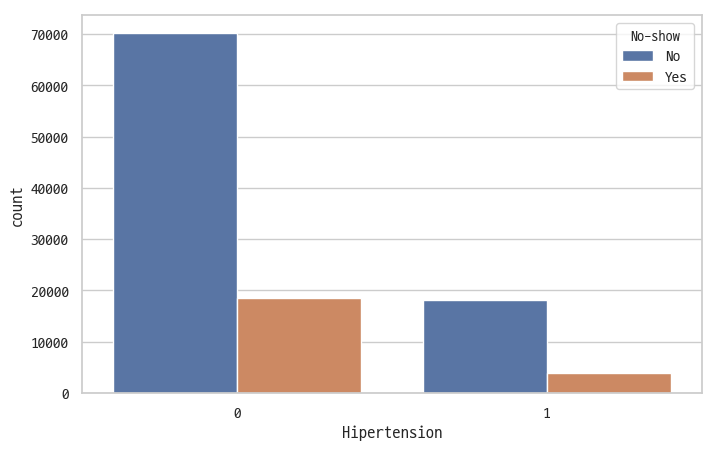

In [18]:
ax = sns.countplot(df_sum.Hipertension, hue=df_sum["No-show"])

In [19]:
ls1 = [l.get_text() for l in ax.get_xticklabels()]

In [20]:
ls2 = [p.get_height() for p in ax.patches]

### 고혈압이 있는 사람이 없는 사람보다 No-show 비율이 낮다.

In [21]:
print("0: ", 18542 / (70177 + 18542),"\n1: ", 3772 / (18029 + 3772))

0:  0.20899694541191852 
1:  0.17301958625751113


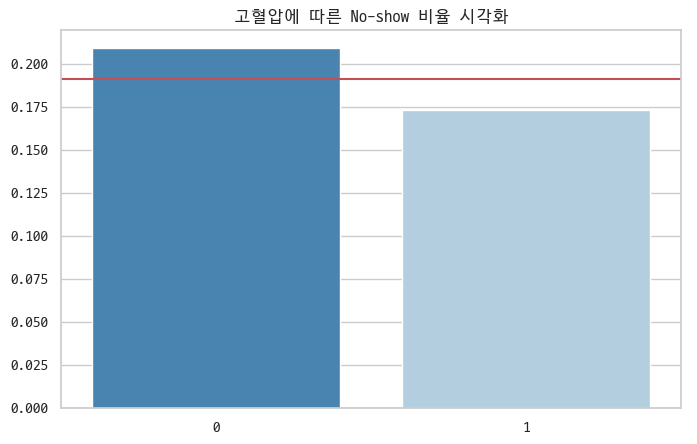

In [22]:
sns.barplot([0,1], [0.2089, 0.1730], palette="Blues_r")
plt.title("고혈압에 따른 No-show 비율 시각화")
plt.axhline(np.mean([0.2089, 0.1730]), color="r")

### 당뇨에 따른 No-show 비율

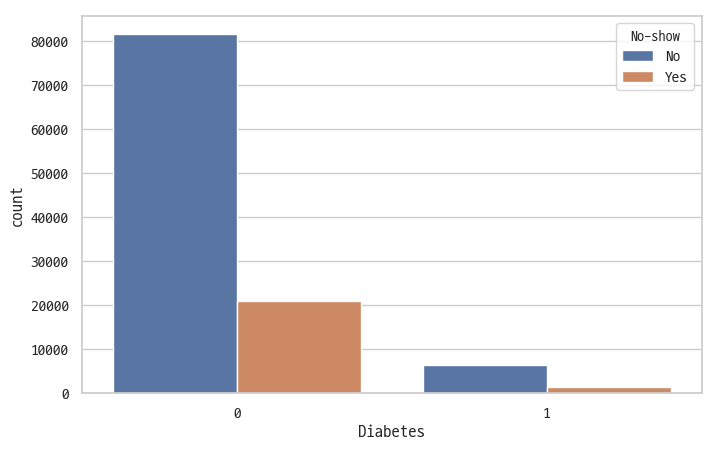

In [23]:
ax = sns.countplot(df_sum.Diabetes, hue=df_sum["No-show"])

In [24]:
ls1 = [l.get_text() for l in ax.get_xticklabels()]

In [25]:
ls2 = [p.get_height() for p in ax.patches]

In [26]:
ls1, ls2

(['0', '1'], [81693, 6513, 20884, 1430])

### 당뇨가 있는 사람이 없는 사람보다 No-show 비율이 낮다.

In [27]:
print("0: ", 20884 / (81693 + 20884),"\n1: ", 1430 / (6513 + 1430))

0:  0.20359339813018512 
1:  0.18003273322422259


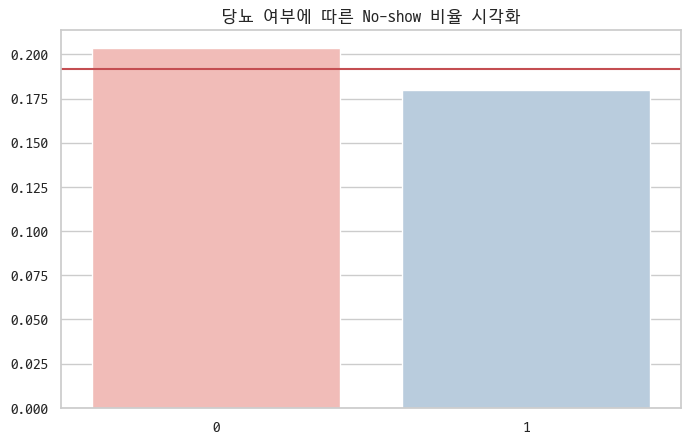

In [28]:
sns.barplot([0,1], [0.2035, 0.18], palette="Pastel1")
plt.title("당뇨 여부에 따른 No-show 비율 시각화")
plt.axhline(np.mean([0.2035, 0.18]), color="r")

### 알콜의존증에 따른 No-show 비율

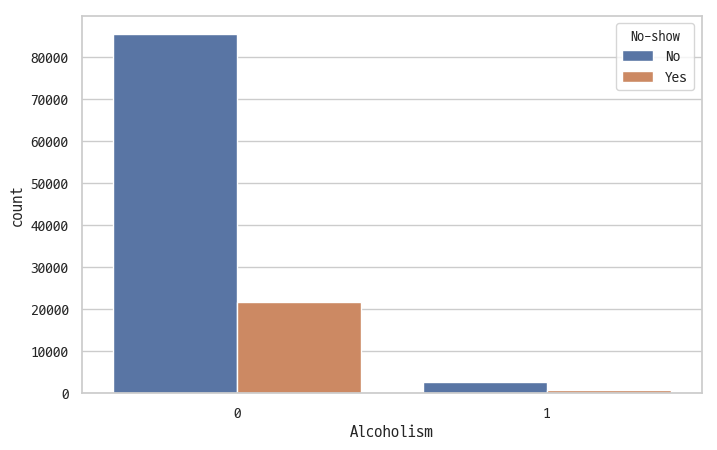

In [29]:
ax = sns.countplot(df_sum.Alcoholism, hue=df_sum["No-show"])

In [30]:
ls1 = [l.get_text() for l in ax.get_xticklabels()]

In [31]:
ls2 = [p.get_height() for p in ax.patches]

In [32]:
ls1, ls2

(['0', '1'], [85523, 2683, 21637, 677])

### 알콜의존증에 따른 No-show 비율의 차이는 없다.

In [33]:
print("0: ", 21637 / (85523 + 21637),"\n1: ", 677 / (2683 + 677))

0:  0.2019130272489735 
1:  0.20148809523809524


### 장애 등급에 따른 No-show 비율

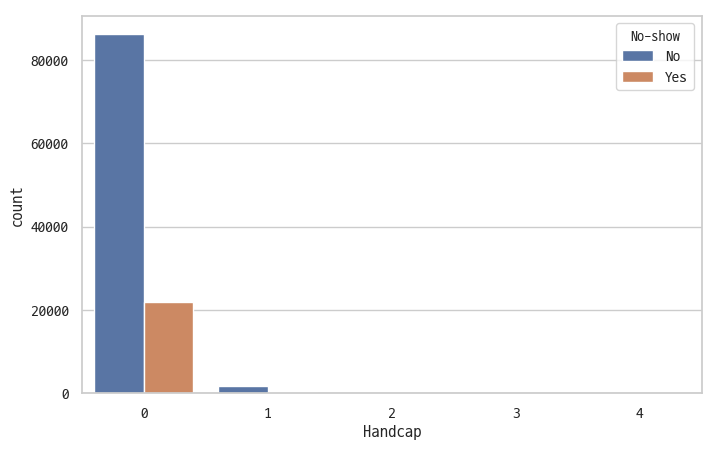

In [34]:
ax = sns.countplot(df_sum.Handcap, hue=df_sum["No-show"])

In [35]:
ls1 = [l.get_text() for l in ax.get_xticklabels()]

In [36]:
ls2 = [p.get_height() for p in ax.patches]

In [37]:
ls1, ls2

(['0', '1', '2', '3', '4'], [86372, 1676, 146, 10, 2, 21909, 364, 37, 3, 1])

### 장애 등급에 따른 No-show 비율의 차이는 존재한다.

In [38]:
print("0: ", 21909 / (86372 + 21909), "\n1: ", 364 / (1676 + 364))
print("2: ", 37 / (146 + 37), "\n3: ", 3 / (10 + 3), "\n4: ", 1 / (2 + 1))

0:  0.20233466628494381 
1:  0.1784313725490196
2:  0.20218579234972678 
3:  0.23076923076923078 
4:  0.3333333333333333


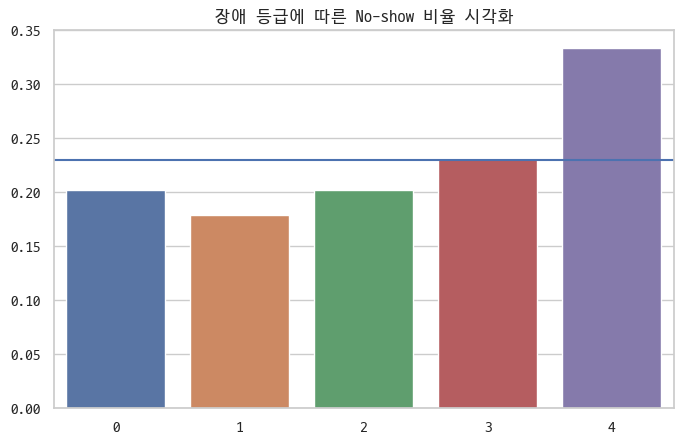

In [39]:
sns.barplot([0,1,2,3,4], [0.2023, 0.1784, 0.2021, 0.2307, 0.3333])
plt.title("장애 등급에 따른 No-show 비율 시각화")
plt.axhline(np.mean([0.2023, 0.1784, 0.2021, 0.2307, 0.3333]))

### google map 에서 Neighbourhood 위도 경도를 크롤링 한 후 dark sky 에서 날씨 크롤링 진행

### 위도 경도 시각화

In [40]:
region_location = pd.read_csv("region_location.csv")

In [41]:
region_location.tail()

,region,latitude,longitude
76,FRADINHOS,-20.305634,-40.332217
77,NAZARETH,-20.305603,-40.345349
78,AEROPORTO,-20.293387,-40.382051
79,ILHAS OCEÂNICAS DE TRINDADE,-20.507148,-29.340806
80,PARQUE INDUSTRIAL,-23.421400,-51.976144


In [42]:
import folium

In [43]:
map_osm = folium.Map(location=[-20.2832243, -40.3260221], zoom_start=4.4)

In [44]:
for i in range(len(region_location)):
    folium.Marker([float(region_location.iloc[i].latitude), float(region_location.iloc[i].longitude)], popup=str(region_location.iloc[i].region)).add_to(map_osm)

In [45]:
map_osm

### 지역에 따른 No-show 시각화

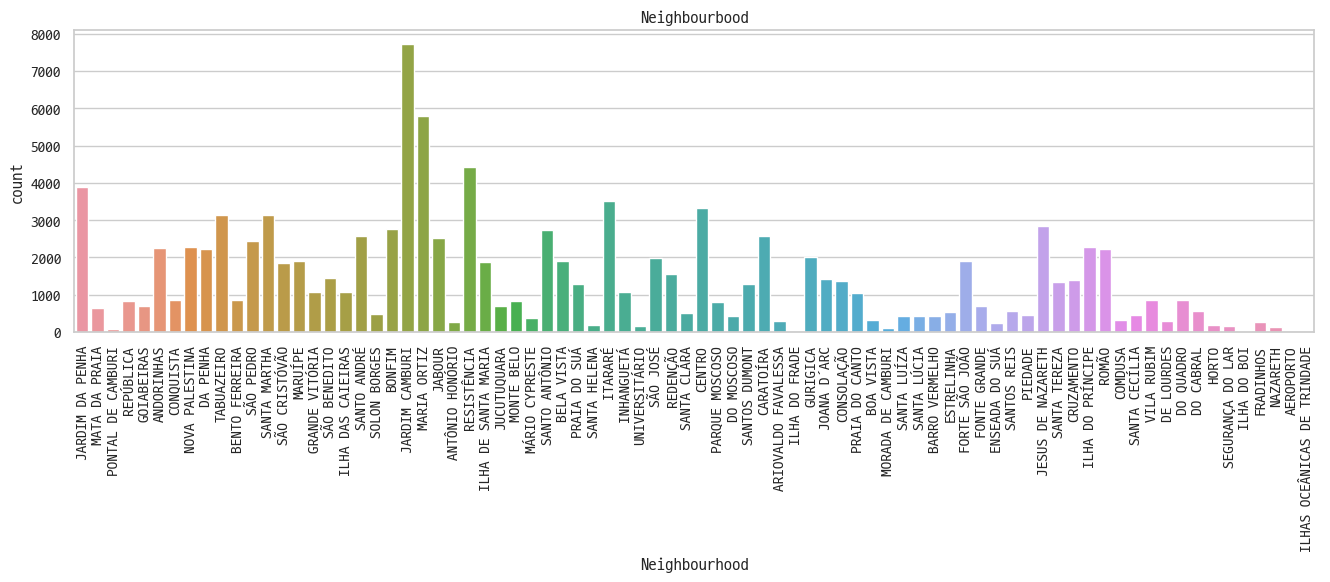

In [46]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(df_sum.Neighbourhood)
ax.set_title("Neighbourbood")
plt.show()

### 섬에서 예약한 사람은 두명 뿐인데 두명 다 약속 시간에 오지 않았다.

In [47]:
df_sum[df_sum.Neighbourhood == "PIEDADE"]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,No-show,Age_bin,Scheduled_date,Scheduled_time,Appointment_date,date_diff,region,temperature,time,weather
2826,6.639457e+13,5634068,F,2016-04-28T10:19:48Z,2016-04-29T00:00:00Z,63,PIEDADE,0,1,1,...,No,60s,2016-04-28,10:19:48,2016-04-29,1,PIEDADE,18.155556,2016-04-29,Overcast
2827,1.599356e+14,5637976,F,2016-04-29T07:35:24Z,2016-04-29T00:00:00Z,64,PIEDADE,0,1,1,...,No,60s,2016-04-29,07:35:24,2016-04-29,0,PIEDADE,18.155556,2016-04-29,Overcast
2828,9.354621e+13,5640351,F,2016-04-29T10:33:27Z,2016-04-29T00:00:00Z,3,PIEDADE,0,0,0,...,No,0s,2016-04-29,10:33:27,2016-04-29,0,PIEDADE,18.155556,2016-04-29,Overcast
2829,3.378764e+11,5632709,F,2016-04-28T08:21:21Z,2016-04-29T00:00:00Z,16,PIEDADE,1,0,0,...,No,10s,2016-04-28,08:21:21,2016-04-29,1,PIEDADE,18.155556,2016-04-29,Overcast
2830,6.851339e+12,5632571,F,2016-04-28T08:10:48Z,2016-04-29T00:00:00Z,36,PIEDADE,1,0,0,...,No,30s,2016-04-28,08:10:48,2016-04-29,1,PIEDADE,18.155556,2016-04-29,Overcast
2831,2.594183e+12,5546336,M,2016-04-05T16:00:06Z,2016-04-29T00:00:00Z,11,PIEDADE,0,0,0,...,No,10s,2016-04-05,16:00:06,2016-04-29,24,PIEDADE,18.155556,2016-04-29,Overcast
2832,2.594183e+12,5546335,M,2016-04-05T15:59:53Z,2016-04-29T00:00:00Z,11,PIEDADE,0,0,0,...,No,10s,2016-04-05,15:59:53,2016-04-29,24,PIEDADE,18.155556,2016-04-29,Overcast
2833,5.252945e+12,5562620,F,2016-04-08T14:00:46Z,2016-04-29T00:00:00Z,43,PIEDADE,0,0,0,...,No,40s,2016-04-08,14:00:46,2016-04-29,21,PIEDADE,18.155556,2016-04-29,Overcast
2834,3.839925e+13,5552547,F,2016-04-06T16:14:36Z,2016-04-29T00:00:00Z,44,PIEDADE,0,0,0,...,No,40s,2016-04-06,16:14:36,2016-04-29,23,PIEDADE,18.155556,2016-04-29,Overcast
2835,3.839925e+13,5552544,F,2016-04-06T16:14:26Z,2016-04-29T00:00:00Z,44,PIEDADE,0,0,0,...,No,40s,2016-04-06,16:14:26,2016-04-29,23,PIEDADE,18.155556,2016-04-29,Overcast


In [48]:
ratio = []
for region in df_sum.Neighbourhood.unique():
    total = len(df_sum[df_sum.Neighbourhood == region])
    yes = len(df_sum[(df_sum.Neighbourhood == region) & (df_sum["No-show"] == "Yes")])
    ratio.append(yes/total)

In [49]:
region = df_sum.Neighbourhood.unique()

In [50]:
np.mean(ratio)

0.20797518616168104

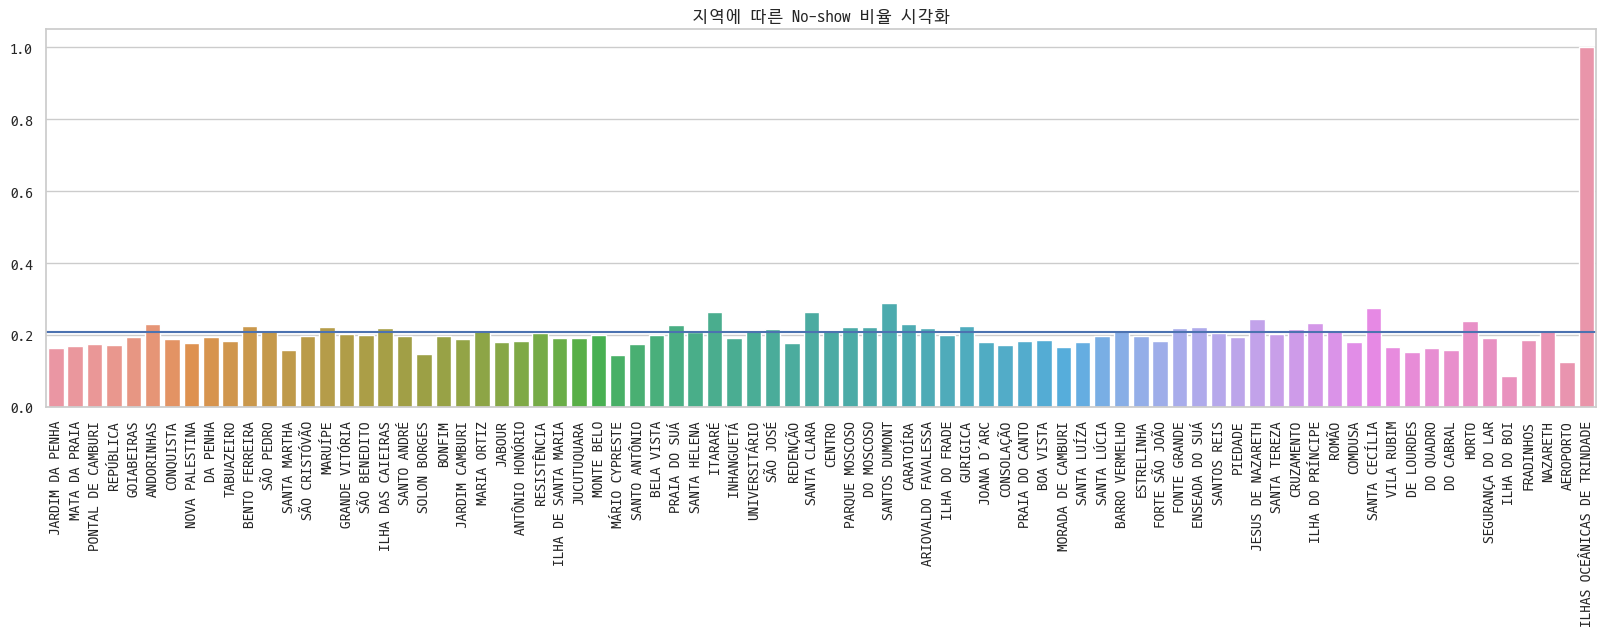

In [51]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.barplot(region, ratio)
plt.title("지역에 따른 No-show 비율 시각화")
plt.axhline(np.mean(ratio))

### 날짜에 따른 No-show 비율 시각화

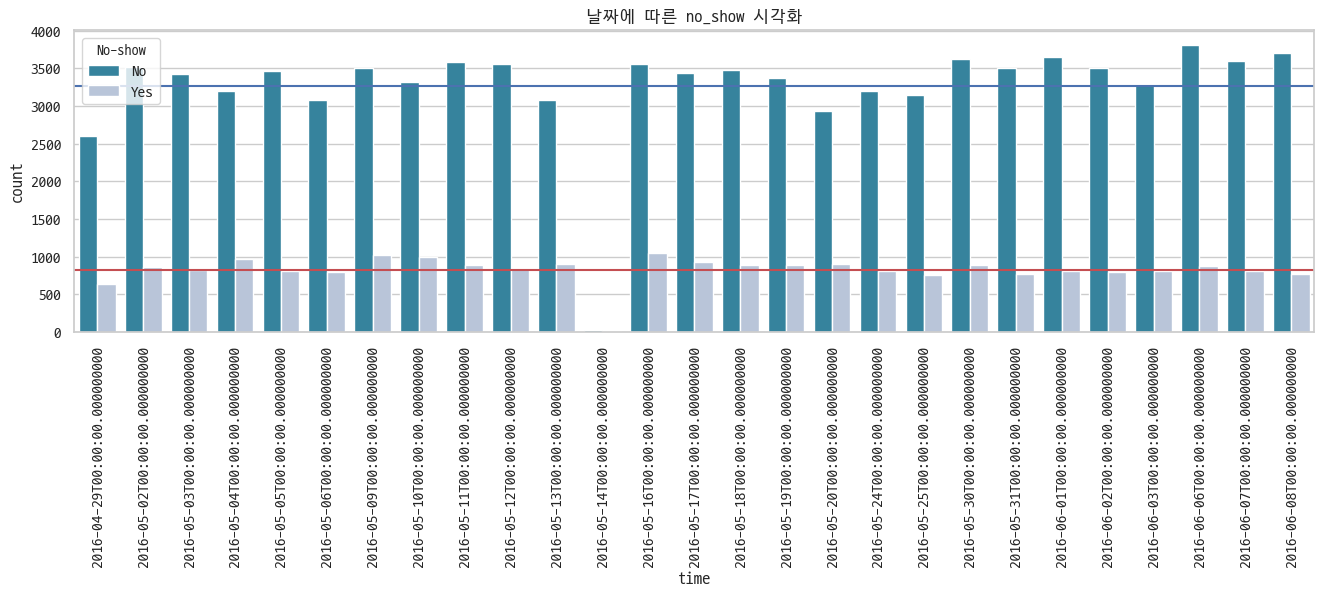

In [52]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(df_sum.time, hue=df_sum["No-show"], palette="PuBuGn_r")
ax.set_title("날짜에 따른 no_show 시각화")
plt.axhline(y=826, color="r")
plt.axhline(y=3266, color="b")
plt.show()

### Appointment 날짜는 27일의 unique한 날짜로 구성되어 있으며 날짜에 따른 No-show 비율의 차이가 존재하는 것으로 보인다.
### 하지만 Appointment 날짜는 27일로 구성되어 있고 시계열 데이터이기 때문에 이 데이터를 대체할 수 있을 만한 데이터 
### 즉지역에 따른 기온과 날씨을 크롤링하여 날짜를 대체할 수 있는 데이터로 집어넣었다.

### 날씨에 따른 No-show 비율 시각화

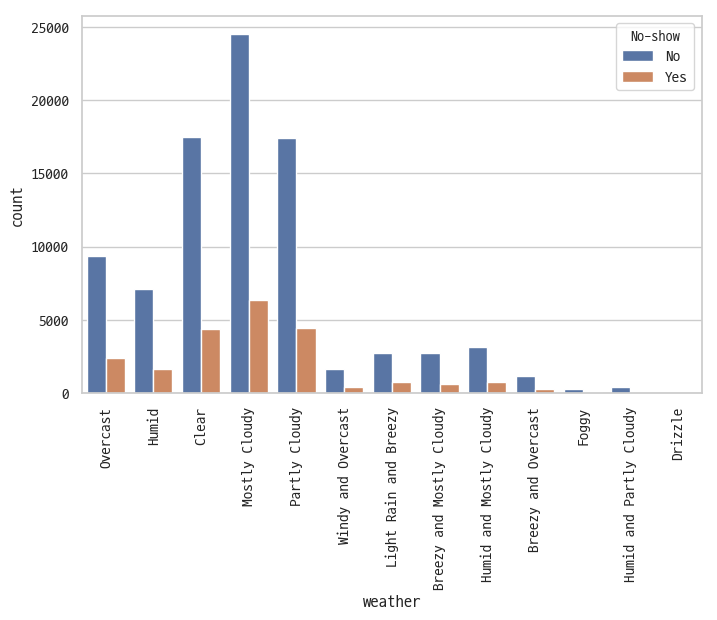

In [53]:
plt.xticks(rotation=90)
ax = sns.countplot(df_sum.weather, hue=df_sum["No-show"])

In [54]:
ls1 = [l.get_text() for l in ax.get_xticklabels()]

In [55]:
ls2 = [p.get_height() for p in ax.patches]

### 날씨에 따른 No-show 비율에 차이가 존재한다.

In [56]:
ratio = []
for i in range(13):
    ratio.append(ls2[i+13] / (ls2[i] + ls2[i+13]))
    print(ls1[i],": ",ls2[i+13] / (ls2[i] + ls2[i+13]))

Overcast :  0.2034750021292905
Humid :  0.18645227505987
Clear :  0.2009315919262033
Mostly Cloudy :  0.2051439862654271
Partly Cloudy :  0.20452364633310485
Windy and Overcast :  0.205666829506595
Light Rain and Breezy :  0.2194634703196347
Breezy and Mostly Cloudy :  0.19022534386889084
Humid and Mostly Cloudy :  0.1941747572815534
Breezy and Overcast :  0.17915531335149865
Foggy :  0.24056603773584906
Humid and Partly Cloudy :  0.20192307692307693
Drizzle :  0.1774193548387097


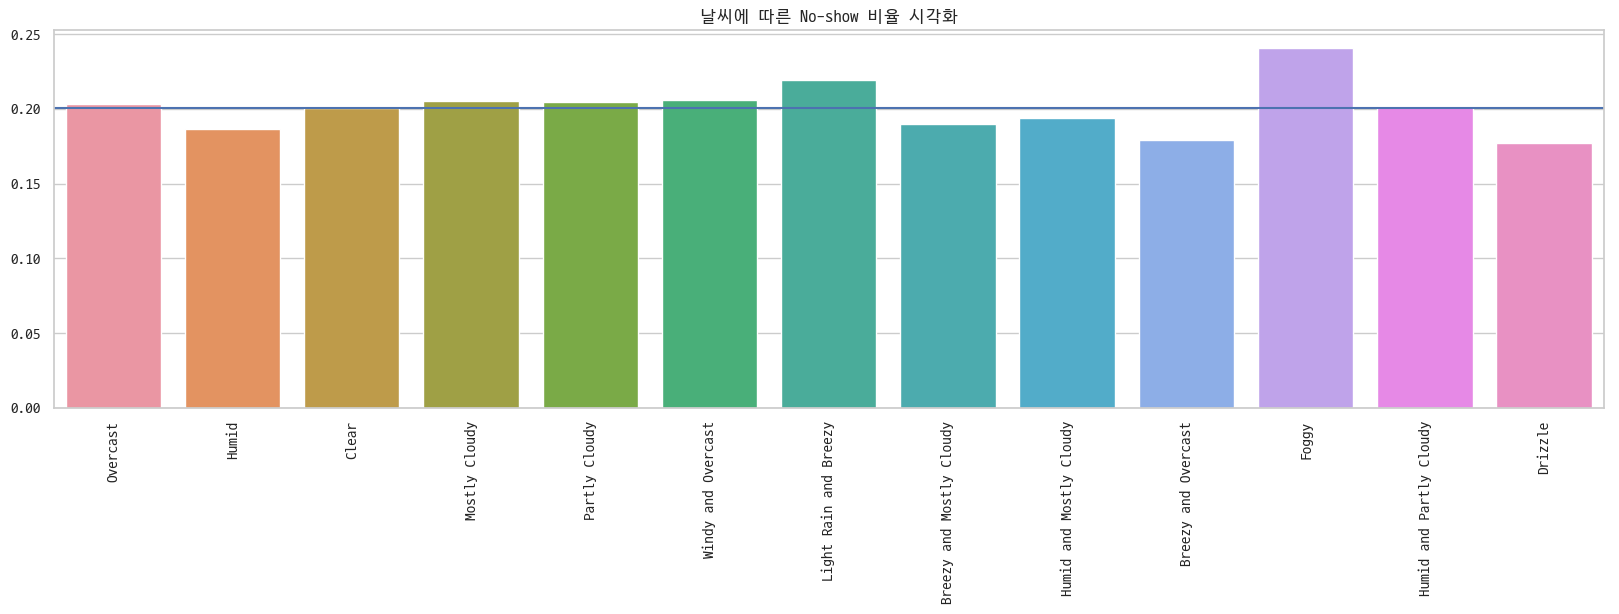

In [57]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.barplot(ls1, ratio)
plt.title("날씨에 따른 No-show 비율 시각화")
plt.axhline(np.mean(ratio))

### 온도는 distplot으로 봤을 때 별 차이가 없어 보인다.
### 하지만 Logit summary에는 P value가 0이다.

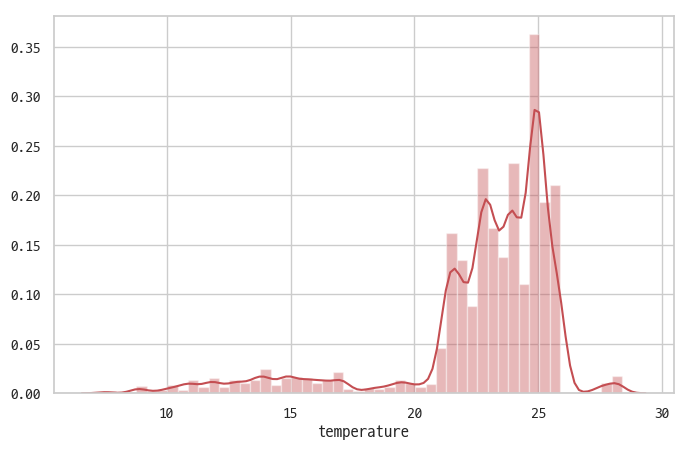

In [173]:
sns.distplot(df_sum[df_sum["No-show"] == "Yes"].temperature, color="r", hist_kws={"color": "r"})

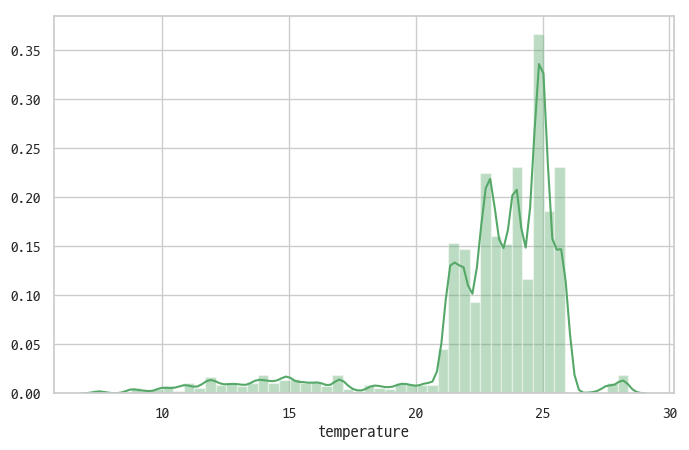

In [174]:
sns.distplot(df_sum[df_sum["No-show"] == "No"].temperature, color="g", hist_kws={"color": "g"})

### dfx와 dfy로 나눠주기

In [134]:
dfx = df_sum.drop(columns=["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay", "Age", "No-show", "Scheduled_date", "Scheduled_time", "Appointment_date", "time", "region"], axis=1)
dfy = df_sum["No-show"]

In [135]:
dfx.tail()

,Gender,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Age_bin,date_diff,temperature,weather
110515,F,NAZARETH,0,0,0,0,0,1,60s,41,25.427778,Humid
110516,F,NAZARETH,0,0,0,0,0,1,30s,41,25.427778,Humid
110517,M,NAZARETH,0,0,0,0,0,1,60s,41,25.427778,Humid
110518,M,AEROPORTO,0,0,0,0,0,0,50s,0,25.638889,Humid
110519,M,ILHA DO BOI,0,0,0,0,0,0,30s,2,22.950000,Mostly Cloudy


In [136]:
dfy.tail()

110515     No
110516    Yes
110517     No
110518     No
110519     No
Name: No-show, dtype: object

### one hot encoding 적용

In [137]:
dfx = pd.get_dummies(dfx, drop_first=True)

In [138]:
dfx.head()

,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,date_diff,temperature,Gender_M,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,...,weather_Drizzle,weather_Foggy,weather_Humid,weather_Humid and Mostly Cloudy,weather_Humid and Partly Cloudy,weather_Light Rain and Breezy,weather_Mostly Cloudy,weather_Overcast,weather_Partly Cloudy,weather_Windy and Overcast
0,0,1,0,0,0,0,22.938889,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,22.938889,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,22.938889,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,1,23,22.938889,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,22.938889,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### train과 test 데이터로 나누기

In [139]:
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((77364, 112), (33156, 112), (77364,), (33156,))

### 비대칭 데이터 처리

### combine sampling

In [126]:
from imblearn.combine import *

In [283]:
X_samp, y_samp = SMOTEENN(random_state=0).fit_sample(X_train, y_train)
#X_samp, y_samp = SMOTEENN(random_state=0).fit_sample(X_samp, y_samp)

In [246]:
X_samp, y_samp = SMOTETomek(random_state=0).fit_sample(X_train, y_train)

### under sampling

In [195]:
from imblearn.under_sampling import *

In [240]:
X_samp, y_samp = OneSidedSelection(random_state=0).fit_sample(X_train, y_train)

In [196]:
X_samp, y_samp = TomekLinks(random_state=0).fit_sample(X_train, y_train)

### over sampling

In [203]:
from imblearn.over_sampling import *

In [204]:
X_samp, y_samp = RandomOverSampler(random_state=0).fit_sample(X_train, y_train)

In [232]:
X_samp, y_samp = ADASYN(random_state=0).fit_sample(X_train, y_train)

In [218]:
X_samp, y_samp = SMOTE(random_state=4).fit_sample(X_train, y_train)

### lightgbm 모형 생성

In [66]:
import warnings
warnings.simplefilter('ignore')

In [67]:
import lightgbm as lgb

In [277]:
model_lgbm = lgb.LGBMClassifier(n_estimators=100, max_depth=100, random_state=0)

In [284]:
model_result = model_lgbm.fit(X_samp, y_samp)

In [285]:
y_pred = model_result.predict(X_test)

In [313]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

In [286]:
confusion_matrix(y_test, y_pred, labels=["Yes", "No"])

array([[ 5112,  1639],
       [10687, 15718]])

In [287]:
accuracy_score(y_test, y_pred)

0.6282422487634214

In [288]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.91      0.60      0.72     26405
         Yes       0.32      0.76      0.45      6751

   micro avg       0.63      0.63      0.63     33156
   macro avg       0.61      0.68      0.59     33156
weighted avg       0.79      0.63      0.66     33156



### ROC Curve

In [341]:
recall = 5112 / (5112 + 1639)
fallout = 10687 / (10687 + 15718)

In [340]:
fpr, tpr, thresholds = roc_curve(y_test, model_result.predict_proba(X_test)[:,1], pos_label="Yes")
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 7.57432304e-05, ...,
        9.99848514e-01, 9.99924257e-01, 1.00000000e+00]),
 array([0.00000000e+00, 1.48126204e-04, 1.48126204e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.96104563, 0.96104563, 0.9323656 , ..., 0.01124995, 0.0110729 ,
        0.01026246]))

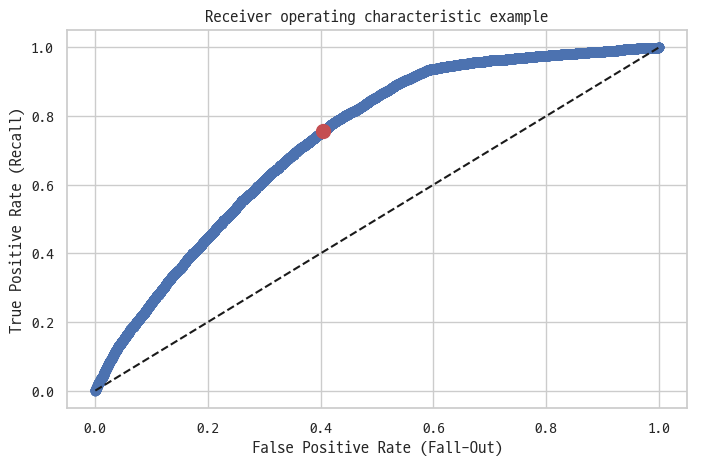

In [342]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

### AUC

In [343]:
auc(fpr, tpr)

0.7315966543392718

### GrideSearchCV

In [344]:
from sklearn.model_selection import GridSearchCV

In [345]:
param_grid = {"n_estimators": [10, 100, 1000], "max_depth": [10, 100, 1000]}

In [347]:
gs = GridSearchCV(estimator=lgb.LGBMClassifier(random_state=0) ,param_grid=param_grid, scoring="accuracy", cv=10, n_jobs=2)


In [ ]:
%%time
gs = gs.fit(X_samp, y_samp)

### Logistic Regression

In [289]:
from sklearn.linear_model import LogisticRegression

In [290]:
model_sk = LogisticRegression().fit(X_samp, y_samp)

In [307]:
# y_pred = model_sk.predict(X_test)
# set thresholds 0.3
y_pred = ["Yes" if x else "No" for x in (model_sk.predict_proba(X_test)[:,1] >= 0.5)]

In [294]:
y_pred = model_sk.predict(X_test)

In [308]:
confusion_matrix(y_test, y_pred, labels=["Yes", "No"])

array([[ 5379,  1372],
       [13822, 12583]])

In [317]:
recall = 5370 / (5379 + 1372)
fallout = 13822 / (13822 + 12583)

In [309]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

          No       0.90      0.48      0.62     26405
         Yes       0.28      0.80      0.41      6751

   micro avg       0.54      0.54      0.54     33156
   macro avg       0.59      0.64      0.52     33156
weighted avg       0.78      0.54      0.58     33156



In [310]:
accuracy_score(y_test, y_pred)

0.5417420678006997

In [311]:
model_sk.decision_function(X_test)

array([-0.90897022,  1.67489612,  2.21634179, ...,  1.61677263,
       -1.09455981,  0.81166791])

### ROC Curve

In [314]:
fpr, tpr, thresholds = roc_curve(y_test, model_sk.decision_function(X_test), pos_label="Yes")
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 1.51486461e-04, ...,
        9.99924257e-01, 1.00000000e+00, 1.00000000e+00]),
 array([0.00000000e+00, 1.48126204e-04, 1.48126204e-04, ...,
        9.99703748e-01, 9.99703748e-01, 1.00000000e+00]),
 array([16.04442821, 15.04442821, 14.22944334, ..., -2.0895767 ,
        -2.12000725, -2.33601877]))

In [318]:
y_hat = model_sk.predict(X_test)
f_value = model_sk.decision_function(X_test)

df1 = pd.DataFrame(np.vstack([f_value, y_hat, y_test]).T,
                  columns=["f", "y_hat", "y"])
df1.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,15.0444,Yes,Yes
1,14.3243,Yes,No
2,14.3145,Yes,No
3,14.2418,Yes,No
4,14.2294,Yes,No
5,13.7232,Yes,Yes
6,13.6885,Yes,No
7,13.3711,Yes,No
8,13.0308,Yes,No
9,12.9695,Yes,No


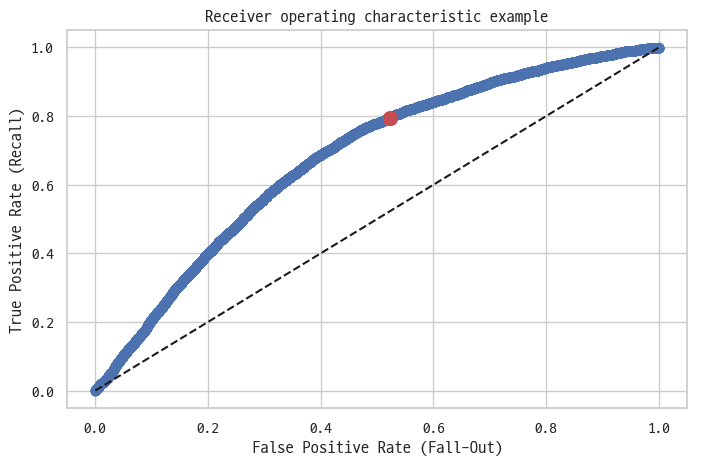

In [319]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

### AUC

In [320]:
auc(fpr, tpr)

0.6795462984983941